In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [4]:
raw = pd.read_csv('/Users/dereklee/biostat-masters-thesis/mimic3c.csv')
raw.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2


In [93]:
raw.describe()

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,149970.809584,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,2.360248
std,28883.095213,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,100001.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,124952.750000,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,1.000000
50%,149989.500000,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,2.000000
75%,174966.500000,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,3.000000
max,199999.000000,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,4.000000


In [94]:
raw.info()

# some na's in AdmitDiagnosis, religion, marital_status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
hadm_id             58976 non-null int64
gender              58976 non-null object
age                 58976 non-null int64
LOSdays             58976 non-null float64
admit_type          58976 non-null object
admit_location      58976 non-null object
AdmitDiagnosis      58951 non-null object
insurance           58976 non-null object
religion            58518 non-null object
marital_status      48848 non-null object
ethnicity           58976 non-null object
NumCallouts         58976 non-null float64
NumDiagnosis        58976 non-null float64
NumProcs            58976 non-null float64
AdmitProcedure      58976 non-null object
NumCPTevents        58976 non-null float64
NumInput            58976 non-null float64
NumLabs             58976 non-null float64
NumMicroLabs        58976 non-null float64
NumNotes            58976 non-null float64
NumOutput           58976 non-null float64
N

In [17]:
sorted([col for col in raw.columns])

['AdmitDiagnosis',
 'AdmitProcedure',
 'ExpiredHospital',
 'LOSdays',
 'LOSgroupNum',
 'NumCPTevents',
 'NumCallouts',
 'NumChartEvents',
 'NumDiagnosis',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumProcEvents',
 'NumProcs',
 'NumRx',
 'NumTransfers',
 'TotalNumInteract',
 'admit_location',
 'admit_type',
 'age',
 'ethnicity',
 'gender',
 'hadm_id',
 'insurance',
 'marital_status',
 'religion']

In [89]:
len(raw.AdmitDiagnosis.unique())

15692

In [106]:
# raw.AdmitDiagnosis.unique() # need to organize these diagnoses again...
# raw.AdmitProcedure.unique() # free text
# raw.ExpiredHospital.unique() # 0,1
# raw.LOSdays.unique() # continuous
# (raw.LOSdays < 0).sum() # no negatives
# raw[raw.LOSdays=="na"] # no NAs

# raw.LOSgroupNum.unique() # array([2, 4, 3, 1])
# raw.NumCPTevents.unique() # no negatives, continuous (but why are there decimals?)
# raw.NumCallouts.unique() # continuous (but why are there decimals?)
# (raw.NumChartEvents < 0).sum() # no negatives, continuous (but why are there decimals?)
# raw.NumDiagnosis.unique() # no negatives, continuous (but why are there decimals?)
# raw.NumInput.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumInput < 0).sum()
# raw.NumLabs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumLabs < 0).sum() 
# raw.NumMicroLabs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumMicroLabs < 0).sum()
# raw.NumNotes.unique() # no negatives, continuous (but why are there decimals?)


# raw.NumOutput.unique() # no negatives, continuous (but why are there decimals?)


# raw.NumProcEvents.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumProcEvents < 0).sum() 

# raw.NumProcs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumProcs < 0).sum() # no negatives, continuous (but why are there decimals?)

# raw.NumRx.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumRx < 0).sum() 

# raw.NumTransfers.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumTransfers < 0).sum() 

# raw.TotalNumInteract.unique() # no negatives, continuous (but why are there decimals?)
# (raw.TotalNumInteract < 0).sum() 

# raw.admit_location.unique() # clean up text categories
# raw.admit_type.unique() # cleaned!
# raw.age.unique() # continuous
# raw.ethnicity.unique() # clean up text categories

# raw.gender.unique() # ['F', 'M']
 

# raw.insurance.unique() # cleaned unless want to collapse further
# raw.marital_status.unique() # missing values
# raw.religion.unique() # Check distributions to see if need to collapse religions


# max(raw.hadm_id.value_counts()) # only one row per patient

array(['EMERGENCY', 'ELECTIVE', 'URGENT', 'NEWBORN'], dtype=object)

## Missing Values:

In [104]:
raw.AdmitDiagnosis.isna().sum() # 25 missing
raw.religion.isna().sum() # 458 missing
raw.marital_status.isna().sum() # 10128 missing

raw.religion.unique()

raw.marital_status.unique()


array(['DIVORCED', 'SINGLE', 'MARRIED', nan, 'WIDOWED',
       'UNKNOWN (DEFAULT)', 'SEPARATED', 'LIFE PARTNER'], dtype=object)

In [110]:
raw_completecase = raw.dropna()

In [113]:
raw_completecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48588 entries, 0 to 58975
Data columns (total 28 columns):
hadm_id             48588 non-null int64
gender              48588 non-null object
age                 48588 non-null int64
LOSdays             48588 non-null float64
admit_type          48588 non-null object
admit_location      48588 non-null object
AdmitDiagnosis      48588 non-null object
insurance           48588 non-null object
religion            48588 non-null object
marital_status      48588 non-null object
ethnicity           48588 non-null object
NumCallouts         48588 non-null float64
NumDiagnosis        48588 non-null float64
NumProcs            48588 non-null float64
AdmitProcedure      48588 non-null object
NumCPTevents        48588 non-null float64
NumInput            48588 non-null float64
NumLabs             48588 non-null float64
NumMicroLabs        48588 non-null float64
NumNotes            48588 non-null float64
NumOutput           48588 non-null float64
N

In [123]:
# there are some string na labels here. If we aren't using this column we can probably ignore

raw_completecase[raw_completecase.AdmitProcedure=='na']



,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
13,100020,M,58,10.58,EMERGENCY,EMERGENCY ROOM ADMIT,HYPONATREMIA,Private,CATHOLIC,MARRIED,WHITE,0.09,1.70,0.00,na,1.70,1.42,32.23,0.66,0.37,1.80,5.20,0.19,0.47,87.33,0,133.16,3
29,100040,M,30,2.88,EMERGENCY,CLINIC REFERRAL/PREMATURE,BLUNT TRAUMA,Private,NOT SPECIFIED,MARRIED,BLACK/AFRICAN AMERICAN,0.35,0.69,0.00,na,2.08,15.97,36.11,0.35,1.20,9.72,16.32,2.78,1.39,471.88,0,558.84,1
45,100065,M,59,3.79,EMERGENCY,EMERGENCY ROOM ADMIT,DIABETIC KETOACIDOSIS,Private,NOT SPECIFIED,MARRIED,BLACK/AFRICAN AMERICAN,0.26,1.32,0.00,na,1.58,21.11,68.07,0.26,0.28,1.06,8.18,0.00,0.79,204.75,0,307.66,1
48,100069,F,33,0.71,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ORGAN DONOR ACCOUNT,Private,CATHOLIC,DIVORCED,WHITE,0.00,1.41,0.00,na,1.41,415.49,460.56,9.86,23.80,40.85,0.00,0.00,2.82,2919.72,1,3875.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58951,199958,M,45,5.71,EMERGENCY,CLINIC REFERRAL/PREMATURE,ASTHMA;COPD EXACERBATIOM,Medicare,OTHER,MARRIED,BLACK/AFRICAN AMERICAN,0.18,1.40,0.00,na,1.23,0.00,23.29,0.35,0.18,1.05,5.08,0.18,0.88,136.95,0,170.77,2
58953,199961,M,58,13.54,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,T8-T9 FRACTURE-UPPER BACK PAIN,Private,CATHOLIC,MARRIED,WHITE,0.00,0.66,0.00,na,0.37,7.61,19.87,0.37,0.10,7.53,3.32,0.00,0.30,400.81,0,440.94,4
58957,199967,F,82,9.79,EMERGENCY,CLINIC REFERRAL/PREMATURE,STROKE/TIA,Medicare,NOT SPECIFIED,SINGLE,WHITE,0.10,1.53,0.00,na,1.23,3.37,30.95,0.20,0.03,2.35,9.40,0.61,0.72,197.45,0,247.94,3
58967,199986,F,73,2.79,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,MYOCARDIAL INFARCTION\CATH,Medicare,PROTESTANT QUAKER,WIDOWED,WHITE,0.00,2.51,2.15,na,0.00,43.73,40.86,0.00,0.90,6.45,13.98,0.00,1.08,469.89,0,581.55,1


## Collapsing categorical variable's categories:

In [82]:
raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace([' PERFORATED DIVERTICULITIS STATUS/POST HARTMANN PROCEDURE/SDA',
                                                                            'ABDOMINAL ABSCESS',
                                                                            'ABSCESS OF GALLSTONES/SDA',
                                                                            "BARRETT'S ESOPHAGUS/SDA",
                                                                          'ABDOMINAL INFECTION',
                                                                           'ABDOMINAL PAIN',
                                                                           'ACUTE CHOLECYSTITIS',
                                                                            'ADRENAL MASS/SDA',
                                                                           'BOWEL OBSTRUCTION',
                                                                           'BOWEL OBSTRUCTION;FAILURE TO THRIVE',
                                                                           'CHOLANGITIS','CHOLANGITIS ABSCESS',
                                                                            'CHOLECYSTITIS','CHRONIC INTERSISTIAL CYSTISTIS/SDA',
                                                                             'COLON CA/SDA','COLON TUMOR BENIGN/SDA','ESOPHAGEAL FOREIGN BODY',
                                                                            'FOREIGN BODY IN ESOPHAGUS',
                                                                                      'FOREIGN BODY IN STOMACH',
                                                                                      'FOREIGN BODY INGESTION',
                                                                                      'GASTROINTESTINAL BLEED',
                                                                                      'GI BLEED',
                                                                                      'HEMATURIA;BLADDER BLEED',
                                                                                      'HEMOPERITONEUM',
                                                                                      'HEMOPTYSIS',
                                                                                      'ISCHEMIC BOWEL; HERNIA',
                                                                            'LIVER LACERATION',
                                                                            'LOWER GASTROINTESTINAL BLEED',
                                                                            'LOWER GI BLEED',
                                                                            'NEED GI SCOPE',
                                                                            'PANCREATIC ABCESS',
                                                                            'PANCREATITIS',
                                                                            'RECTAL BLEEDING',
                                                                            'RUPTURED DUODENAL ULCER',
                                                                            'SMALL BOWEL OBSTRUCTION',
                                                                            'SPLEENIC LACERATION',
                                                                            'UPPER GASTROINTESTINAL BLEED',
                                                                            'UPPER GI BLEED',
                                                                            'UPPER GI BLEED;TELEMETRY',
                                                                            'CHRONIC INTERSISTIAL CYSTISTIS/SDA','COLON CA/SDA','COLON TUMOR BENIGN/SDA', 
                                                                                       "CROHN'S /SDA","CROHN'S DISEASE/SDA",'ESOPHAGEAL CA/SDA',
                                                                                       'GASTRIC FUNDAL VARICES STAGE 4/SDA',
                                                                                       'GASTRIC MASS/SDA',
                                                                                       'GERD/SDA','INCISIONAL HERNIA/SDA','LARGE ABDOMINAL MASS/SDA','LIVER MASS/SDA',
                                                                                       'LOWER GI BLEED/SDA','MORBID OBESITY;INCISIONAL HERNIA;GALLSTONES/SDA',
                                                                                       'PANCREATIC CA/SDA','PANCREATIC MASS/SDA','NON HEALING ULCER','STOMACH CA/SDA',
                                                                                       'VENTRAL HERNIA/SDA','SUPER RENAL ANEURYSM/SDA',
                                                                                      "BARRET'S ESOPHAGUS/SDA","ESOPHAGEAL CA AND DOWN'S SYNDROME/SDA",
                                                                                       'PEPTIC ULCER;HIATIAL HERNIA/SDA','SPLENIC RUPTURE'],'GI')

raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['AAA\\AORTIC VALVE REPLACEMENT;ASCENDING AORTIC  REPLACEMENT;AORTIC ARCH REPLACEMENT;DHCA/SDA',
                                                                            'ABDOMINAL AORTIC ANEURYSM/SDA',
                                                                            'ABDOMINAL AORTIC ANEURYSM',
                                                                           'ABDOMINAL AORTIC ANEURYSM;',
                                                                           'ABDOMINAL AORTIC ANURISM REPAIR',
                                                                            'ACENDING AORTIC ANEYRYS\\BENTAL PROCEDURE /SDA',
                                                                            'ACUTE CORONARY SYNDROME',
                                                                           'ACUTE CORONARY SYNDROME\\CATH',
                                                                           'ACUTE MYOCARDIAL INFARCTION',
                                                                           'ACUTE SUBDORAL HEMATOMA',
                                                                           'ACUTE SUBDURAL HEMATOMA',
                                                                            'ACUTE CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT ',
                                                                          'ALCOHOL WITHDRAWL;CARDIOMYOPATHY;VENTRICULAR TACHYCARDIA',
                                                                           'ANGINA;+ETT','AORTIC DISSECTION',
                                                                           'AORTIC INSUFFICIENCY','AORTIC STENISIS',
                                                                           'AORTIC STENOSIS',
                                                                           'AORTIC STENOSIS;CORONARY ARTERY DISEASE\\AORTIC ROOT REPLACEMENT REPAIR;? ASCENDING AORTIC REPLACEMENT',
                                                                           'AORTIC VALVE ENDOCARDITIS;AORTIC INSUFFICIENCY\\CATH',
                                                                           'ATRIAL TACHYCARDIA',
                                                                            'AORTIC INSUFFICIENCY & ENLARGEMENT\\AORTIC VALVE REPLACEMENT /SDA',
                                                                             'AORTIC INSUFFICIENCY\\AORTIC AND MITRAL VALVE REPLACEMENT /SDA',
                                                                             'AORTIC INSUFFICIENCY\\AORTIC VALVE REPLACEMENT /SDA',
                                                                             'AORTIC INSUFFICIENCY\\BENTAL PROCEDURE; REPLACING ASCENDING & HEMI-ARCH AORTA; ? CABG W/DEEP HYPOTHERMIC ARREST/SDA',
                                                                             'AORTIC STENOSIS; CAD\\AORTIC VALVE REPLACEMENT; POSSIBLE CORONARY ARTERY BYPASS GRAFT & MAZE',
                                                                             'AORTIC STENOSIS;MR\\ AORTIC AND MITRAL VALVE REPLACEMENT',
                                                                            'AORTIC STENOSIS\\? CORONARY ARTERY BYPASS GRAFT WITH AVR /SDA',
                                                                            'AORTIC STENOSIS\\AORTIC AND MITRAL VALVE REPLACEMENT ',
                                                                         'AORTIC STENOSIS\\AORTIC AND MITRAL VALVE REPLACEMENT  BENTAL PROCEDURE /SDA',
                                                                        'AORTIC STENOSIS\\AORTIC AND MITRAL VALVE REPLACEMENT /SDA',
                                                                        'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT ',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT  ? BENTAL PROCEDURE ',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT /SDA',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT REDO /SDA',
                                                                        'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT WITH HOMOGRAFT /SDA',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT, ? MITRAL VALVEREPLACEMENT /SDA',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT/SDA',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT; ? CORONARY ARTERY BYPASS GRAFT /SDA',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT; RE-DO STERNOTOMY/SDA',
                                                                         'AORTIC STENOSIS\\AORTIC VALVE REPLACEMENT;MITRAL VALVE REPLACEMENT/SDA',
                                                                         'AORTIC STENOSIS\\BENTAL PROCEDURE; REDO STERNOTOMY/SDA',
                                                                         'AORTIC STENOSIS\\CORONARY ARTERY BYPASS GRAFT WITH AVR ',
                                                                         'AORTIC STENOSIS\\CORONARY ARTERY BYPASS GRAFT WITH AVR /SDA',
                                                                         'AORTIC STENOSIS\\CORONARY ARTERY BYPASS GRAFT WITH AVR, ?BENTAL PROCEDURE /SDA',
                                                                         'AORTIC STENSIS\\? CORONARY ARTERY BYPASS GRAFT WITH AVR REDO /SDA',
                                                                         'AORTIC VALVE DISORDER\\AORTIC VALVE REPLACEMENT /SDA',
                                                                         'AORTIC VALVE DISORDER\\AORTIC VALVE; ? ASCENDING AORTA REPLACEMENT /SDA',
                                                                         'AORTIC VALVE DISORDER\\RESECTION OF AORTIC MASS VS AORTIC VALVE REPLACMENT',
                                                                         'AORTIC VALVE INSUFFICENCY\\CORONARY ARTERY BYPASS GRAFT WITH AVR /SDA',
                                                                         'AORTIC VALVE INSUFFICIENCY\\AORTIC VALVE REPLACEMENT ',
                                                                         'AORTIC VALVE INSUFFICIENCY\\AORTIC VALVE REPLACEMENT /SDA',
                                                                         'AORTIC VALVE INSUFFICIENCY\\AVR;? BENTAL PROCEDURE /SDA',
                                                                         'AORTIC VALVE INSUFFIENCY\\AORTIC VALVE REPLACEMENT /SDA',
                                                                        'AORTIC VALVE STENOSIS\\AORTIC VALVE REPLACEMENT /SDA',
                                                                         'AORTIC INSUFFICIENCY\\CORONARY ARTERY BYPASS GRAFT WITH AVR /SDA',
                                                                        'AORTIC STENOSIS\\AVR ? CABG','AORTIC VALVE DISEASE;CHF','ASCENDING AORTIC DISSECTION',
                                                                        'ASD\\REPAIR ATRIAL SEPTAL DEFECT /SDA',
                                                                         'ARTERIOVENOUS FISTULA/SDA',
                                                                         'AR\\AORTIC VALVE REPLACEMENT/SDA',
                                                                     'AS,\\  REDO STERNOTOMY AVR; ASCENDING AORTIC ARCH REPLACEMENT',
                                                                         'ASCENDING AORTA\\BENTAL PROCEDURE /SDA',
                                                                        'ASCENDING SINUS VENUS\\ REPAIR ANOMALY PULMONARY VEIN; ASCENDING AORTIC VALVE REPLACEMENT/SDA',
                                                                         'ATHEROSCLEROSIS OF LEFT LOWER EXTREMITY',
                                                                         'ATRIAL FIBRILLATION\\ATRIAL FIBRILLATION ABLATION',
                                                                         'ATRIAL FIBRILLATION\\BILATERAL THORACOSCOPIC MINI MAZE PROCEDURE WITH LEFT ATRIAL APPENDAGE RESECTION -MEDTRONIC ABLATION SYSTEM ',
                                                                         'ATRIAL FIBRILLATION\\MINI-MAZE PROCEDURE, PULMONARY VEIN ABLATION,  BILATERAL/SDA',
                                                                         'ATRIAL FIBRILLATION\\THORACOSCOPIC MINI MAZE PROCEDURE /SDA',
                                                                         'ATRIAL SEPTAL DEFECT;PATENT FORAMEN OVALE\\MINIMALLY INVASIVE PATENT FORAMEN OVALE ',
                                                                         'ATRIAL SEPTAL DEFECT\\REPAIR ATRIAL SEPTAL DEFECT ',
                                                                        'ATRIAL SEPTAL DEFECT\\REPAIR ATRIAL SEPTAL DEFECT LIMITED ACCESS MINIMALL INVASIVE/SDA',
                                                                         'ATRIAL SEPTIC DEFECT\\REPAIR ATRIAL SEPTAL DEFECT; MINIMALLY INVASIVE',
                                                                            'BRADYCARDIA',
                                                                           'BRADYCARDIA;DIZZINESS',
                                                                            'BICUSPID AORTIC VALVE DISRODER\\AORTIC VALVE REPLACEMENT ? BENTAL PROCEDURE ',
                                                                             'BISCUPID VALVE;DILATED AORTIC ROOT',
                                                                            'CAD, MR\\CORONARY ARTERY BYPASS GRAFT;MITRAL VALVE REPLACEMENT/SDA',
                                                                            'CAD\\CORONARY ARTERY BYPASS GRAFT WITH MVR;MAZE',
                                                                           'CAD,AORTIC VALVE DISEASE',
                                                                           'CARDIOMYOPATHY',
                                                                           'CAROTID STENOSIS',
                                                                           'CAROTID STENOSIS LEFT',
                                                                           'CAROTID STENOSIS\\CAROTID ANGIOGRAPHY',
                                                                           'CHEST PAIN',
                                                                           'CHEST PAIN/CATH',
                                                                           'CHEST PAIN;ABNORMAL ECHO;ADNORMAL EKG\\CARDIAC CATH',
                                                                           'CHEST PAIN;ANGINA PECTORIS\\CARDIAC CATH',
                                                                           'CHEST PAIN;NON-Q WAVE MI',
                                                                           'CHEST PAIN;RULE OUT CORONARY ARTERY DISEASE;ASPIRIN ALLERGY\\LEFT HEART CATHETERIZATION',
                                                                           'CHEST PAIN;UNSTABLE ANGINA',
                                                                           'CHEST PAIN\\ASPIRIN DESENSITIZATION;CATH',
                                                                           'CHEST PAIN\\CARDIAC CATH',
                                                                           'CHEST PAIN\\CARDIAC CATHETERIZATION',
                                                                           'CHEST PAIN\\CATH',
                                                                            'CAROTID STENOSIS/SDA',
                                                                            'CLAUDICATION\\BILATERAL ANGIOGRAM WITH RUN-OFFS',
                                                                            'COMPLETE HEART BLOCK',
                                                                            'CONGESTIVE HEART FAILURE',
                                                                            'CONGESTIVE HEART FAILURE/MITRAL REGURGITATION',
                                                                            'CONGESTIVE HEART FAILURE;CORONARY ARTERY DISEASE',
                                                                            'CONGESTIVE HEART FAILURE;DYSPNEA\\CATH',
                                                                            'CONGESTIVE HEART FAILURE;TELEMETRY;CORONARY ARTERY DISEASE;DIABETES MELLITUS',
                                                                            'CONGESTIVE HEART FAILURE\\CATH',
                                                                            'CORONARY ARTERY DISEASE',
                                                                            'CORONARY ARTERY DISEASE/CATH',
                                                                            'CORONARY ARTERY DISEASE;+ETT\\CATH',
                                                                            'CORONARY ARTERY DISEASE;ANGINA\\CATH',
                                                                            'CORONARY ARTERY DISEASE;AORTIC STENOSIS',
                                                                            'CORONARY ARTERY DISEASE;CHEST PAIN',
                                                                            'CORONARY ARTERY DISEASE;DYSPNEA;COPD',
                                                                            'CORONARY ARTERY DISEASE;HYPERTENSION\\CATH',
                                                                            'CORONARY ARTERY DISEASE;PROGRESSIVE CHEST PAIN\\CATH',
                                                                            'CORONARY ARTERY DISEASE;UNSTABLE ANGINA',
                                                                            'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT',
                                                                            'CORONARY ARTERY DISEASE;CARDIACTAMPONADE',
 'CORONARY ARTERY DISEASE;CP',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFTWITH AVR /SDA',
 'DESCENDING THORACIC AORTA\\ AORTIC VALVE REPLACEMENT W/ ASCENDING AORTIC GRAFT BYPASS TO THORACIC DESCENDING AORTA/SDA',

                                                                            'CONGESTIVE HEART FAILURE; ATRIAL FIBRILLATION; S/P CVA\\BIVENTRICULAR ICD IMPLANTATION/SDA',
 'CONTRICTIVE PERICARDITIS\\PERICARDIAL STRIPPING/SDA',
 'CORONARY ARTERY DISEASE; MR\\CORONARY ARTERY BYPASS GRAFT;MITRAL VALVE REPLACEMENT/SDA',
 'CORONARY ARTERY DISEASE\\ CORONARY ARTERY BYPASS GRAFT/SDA',
 'CORONARY ARTERY DISEASE\\AORTIC VALVE REPLACEMENT /SDA',
 'CORONARY ARTERY DISEASE\\AORTIC VALVE REPLACEMENT, R.F. MAZE PROCEDURE /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT ',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT W/OPEN LUNG BIOPSY/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT W/POSSIBLE ATRIAL SEPTAL DEFECT CLOSURE /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT W/VENTRICULAR ASSIST DEVICE BACKUP/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH AVR ',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH AVR /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH AVR;  ? MITRAL VALVE REPLACEMENT /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH AVR;POSSIBLE MITRAL VALVE REPLACEMENT ',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR ',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR AND TVR/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR LVAD',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR; ? MAZE',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR; ? OF MAZE PROCEDURE /SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT; ? AVR AND MVR/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT; W/MVR/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT; WITH AVR/SDA',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT; WITH MVR/SDA',
 'CORONARY ARTERY DISEASE\\HIBRID MINIMALY INVASIVE CORONARY ARTERY BYPASS GRAFT AND CORONARY STENTING /SDA',
 'CORONARY ARTERY DISEASE\\MITRAL VALVE REPLACEMENT /SDA',
 'CORONARY ARTERY DISEASE\\RE-DO CORONARY ARTERY BYPASS GRAFT WITH AVR ',
 'CORONARY ARTERY DISEASE\\RIGHT VENTRICULAR OUTFLOW TRACK/PULMONIC ARTERY RECONSTRUCTION ? CORONARY ARTERY BYPASS GRAFT WITH AVR  ? TRISCUPID VALVE REPLACEMENT ',
 'CORONARY ATHEROSCLEROSIS OF NATIVE CORONARY\\CORONARY ARTERY BYPASS GRAFT WITH MVR /SDA',
 'CORONARY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA','CVA\\ PATENT FORAMEN OVALE',
 'DILATED ASCENDING AORTA\\AORTIC VALVE REPLACEMENT /SDA',
 'DRUG REFRACTORY ATRIAL FIBRILLATION\\PULMONARY VEIN ISOLATION  **REMOTE WEST**/SDA', 'CLAUDICATION/SDA',
                                                                            'CRITICAL AS , LEFT MAIN',
                                                                            'END ST ELEVATED MYOCARDIAL INFARCTION',
                                                                            'FOOT NUMBNESS;CLAUDICATION\\RIGHT LEG ANGIOGRAM',
                                                                            'HEART BLOCK,NON STE MI',
                                                                            'HYPOTENSION','ISCHEMIC FOOT',
                                                                            'LEFT ANTERIOR DESCENDING ARTERY PERFERATION',
                                                                            'LEFT ATRIAL TUMOR',
                                                                            'LEFT CELEBRAL STENOSIS/SDA',
                                                                            'MALFUCTION ICD','MITRAL REGURGITATION',
                                                                            'MITRAL REGURGITATION;CHF',
                                                                            'MITRAL VALVE DISEASE',
                                                                            'MYOCARDIAL INFARCTION\\CATH',
                                                                            'NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION',
                                                                            'NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION\\CATH',
                                                                            'PERF APPENDIX',
                                                                            'PERICARDIAL EFFUSION',
                                                                            'PERICARDIAL EFFUSION WITH TAMPONADE\\PERICARDIOCENTESIS',
                                                                            'PERICARDIAL EFFUSION\\PERICARDIAL TAP/SDA',
                                                                            'PNA/AFIB',
                                                                            'POLYMORPHIC VENTRICULAR TACHYCARDIA\\CARDIAC CATH',
                                                                            'PULSELESS LEFT FOOT',
                                                                            'RECURRENT VENTRICULAR TACHYCARDIA;STATUS POST IMPLANTABLE CARDIOVERTER DEFIBRILLATOR FIRING\\VENTRICULAR TACHYCARDIA ABLATION',
                                                                            'RUPTURED AORTIC PLAQUE',
                                                                            'S/P ARREST',
                                                                            'S/P CARDIAC ARREST',
                                                                            'S/P VFIB ARREST',
                                                                            'SDH/SAH',
                                                                            'SPONTANEOUS SAH',
                                                                            'ST ELEVATED MYOCARDIAL INFARCTION',
                                                                            'ST ELEVATED MYOCARDIAL INFARCTION\\CARDIAC CATHETERIZATION',
                                                                            'ST ELEVATION MI\\CATH',
                                                                            'ST ELEVATION MYOCARDIAL INFARCTION\\CATH',
                                                                            'ST SEGMENT MYOCARDIAL INFARCTION\\CATH',
                                                                            'ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION\\CATH',
                                                                            'STEMI',
                                                                            'STEMI\\CARDIAC CATH',
                                                                            'STEMYOCARDIAL INFARCTION',
                                                                            'STROKE/TIA',
                                                                            'SUBARACHNOID HEMATOMA',
                                                                            'SUBARACHNOID HEMORRHAGE',
                                                                            'SUBARACHNOID HEMORRHAGE;SDH;TELEMETRY',
                                                                            'SUBARRACHNOID HEMMORAGE',
                                                                            'SUBDURAL',
                                                                            'SUBDURAL HEMATOMA',
                                                                            'SUBDURAL HEMATOMA;TELEMETRY',
                                                                            'SUBDURAL HEMORRHAGE',
                                                                            'SUBURAL HEMATOMA;TELEMETRY',
                                                                            'SYMPTOMATIC BRADYCARDIA',
                                                                            'SYNCOPE;TELEMETRY',
                                                                            'THORACIC AORTIC ANEURYSM',
                                                                            'TRANSIENT ISCHEMIC ATTACK',
                                                                            'UNSTABLE ANGINA',
                                                                            'VENTRICULAR SEPTAL D EFFECT',
                                                                            'MITRAL REGURGITATION & RENAL INSUFFICIENY\\MITRAL VALVE REPLACEMENT  W/ ? MAZE',
                                                                            'LARGE LEFT ATRIAL MASS\\ ATRIAL MYXOMA REMOVAL/SDA',
 'LEFT MAIN CORONARY ARTERY DISEASE',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT /SDA',
 'MITRAL VALVE REGURGITATION\\MITRAL VALVE REPLACEMENT,HEART PORT MINIMALLY INVASIVE /SDA',
 'MR\\MITRAL VALVE REPLACEMENT MINIMALLY INVASIVE APPROACH/SDA',
'STROKE-TRANSIENT ISCHEMIC ATTACK',
 'STROKE;TIA',
 'SUBDURAL SUBARACHNOID',
 'THORACIC AROTIC ANEURYSM',
'VENTRICULAR TACHYCARDIA;TELEMETRY',
 'MITRAL REGURGITATION\\AORTIC AND MITRAL VALVE REPLACEMENT /SDA',
 'MITRAL REGURGITATION\\CORONARY ARTERY BYPASS GRAFT WITH MVR ',
 'MITRAL REGURGITATION\\MINIMALLY INVASIVE MITRAL VALVE REPAIR VS REPLACEMENT/SDA',
 'MITRAL REGURGITATION\\MINIMALLY INVASIVE MITRAL VALVE REPLACEMENT /SDA',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT ',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT MINIMALLY INVASIVE ',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT, HEART PORT MINIMALLY INVASIVE VS STERNOTOMY/SDA',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT,HEART PORT MINIMALLY INVASIVE /SDA',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT,HEART PORT MINIMALLY INVASIVE w/ MAZE',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT/CONCOMITANT MAZE/SDA',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT; HEART PORT MINIMALLY INVASIVE/SDA',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT; MAZE; LEFT ATRIAL APPENDAGE/SDA',
 'MITRAL REGURGITATION\\MITRAL VALVE REPLACEMENT; W/RIGHT THORACTOMY MAZE',
 'MITRAL VALVE DISEASE\\MITRAL VALVE REPLACEMENT,HEART PORT MINIMALLY INVASIVE; ? PATENT FORAMEN OVALE CLOSURE /SDA',
 'MITRAL VALVE DISORDER\\AORTIC AND MITRAL VALVE REPLACEMENT;   THORACOSCOPIC MAZE PROCEDURE;  BRONCHOSCOPY FLEXIBLE DIAGNOSTIC /SDA',
 'MITRAL VALVE DISORDER\\MITRAL VALVE REPLACEMENT /SDA',
 'MITRAL VALVE INSUFFICENCY\\MITRAL VALVE REPLACEMENT /SDA',
 'MITRAL VALVE INSUFFICIENT\\AORTIC VALVE REPLACEMENT /SDA',
 'MITRAL VALVE PROLAPSE\\ MINIMALLY INVASIVE MVR ? OPEN MVR/SDA',
 'MITRAL VALVE REGURGITATION\\REPAIR MITRAL VALVE /SDA',
'MR\\MITRAL VALVE REPLACEMENT /SDA',
 'MR\\MITRAL VALVE REPLACEMENT,HEART PORT MINIMALLY INVASIVE /SDA',
 'MR\\MITRAL VALVE REPLACEMENT; ? CORONARY ARTERY BYPASS GRAFT ',
 'MTIRAL REGURGITATION\\MINIMALLY INVASIVE MITRAL VALVE REPAIR/SDA',
 'MVP\\MITRAL VALVE REPLACEMENT; HEART PORT MINIMALLY INVASIVE/SDA',
 'MVR\\MITRAL VALVE REPLACEMENT /SDA',
'PAROXYSMAL ATRIAL AFRIBILLATION\\MITRAL VALVE REPLACEMENT (FULL MAZE) /SDA',
'PATENT FORAMEN OVALE\\PATENT FORAMEN OVALE CLOSURE',
 'PATENT FORAMEN OVALE\\PATENT FORAMEN OVALE MINIMALLY INVASIVE ',
 'PFO\\PATENT FORAMEN OVALE CLOSURE ',
 'PFO\\PATENT FORAMEN OVALE;MINIMALLY INVASIVE',
'PULMONARY VEIN INJURY\\THORACOSCOPIC MAZE PROCEDURE LEFT;MINI MAZE;BILATERAL MINI THORACOTOMY;PULMONARY VEIN ISOLATION;RESECTION OF LEFT ATRIAL APPENDAGE/SDA',
 'REGURGITAION\\MITRAL VALVE REPLACEMENT/SDA',
'RHEUMATIC HEART DISEASE\\MITRAL VALVE REPLACEMENT REDO  TRICUSPID VALVE REPLACEMENT /SDA',
 'RIGHT CHOLESTEROL CYST/SDA',
'S/P CABG\\STERNAL PLATING /SDA',
'SEPTAL DEFECT\\PATENT FORAMEN OVALE MINIMALLY INVASIVE /SDA',
 'SEPTAL DEFECT\\REPAIR ATRIAL SEPTAL DEFECT LIMITED ACCESS /SDA',
 'SEVERE AS\\AORTIC VALVE REPLACEMENT/SDA',
 'SHORTNESS OF BREADTH; HYPERTENSION; AFIBRILLATION\\MITRAL VALVE REPLACEMENT REDO /SDA',
'THORACIC ANEURYSM',
 'THORACIC ANEURYSM WITHOUT RUPTURE\\AORTIC VALVE REPLACEMENT /SDA',
 'THORACIC ANEURYSM/SDA',
 'THORACIC AORTIC ANEURYSM\\BENTAL PROCEDURE /SDA',
 'VENTRICULAR TACHYCARDIA\\VENTRICULAR TACHYCARDIA ABLATION  **REMOTE WEST**'],'CARDIOVASCULAR')

raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['ALTERED MENTAL STATUS',
                                                                           'ALTERED MENTAL STATUS;TELEMETRY',
                                                                            'ACOUSTIC NEUROMA LEFT EAR/SDA',
                                                                            'ACOUSTIC NEUROMA, LEFT EAR/SDA',
                                                                            'ANEURYSM/SDA',
                                                                            'ANTERIOR COMMUNICATING ANEURYSM/SDA',
                                                                           'ASCENDING THORASIC ANEURYSM',
                                                                           'BRAIN MASS',
                                                                           'BRAIN TUMOR',
                                                                            'EPIDURAL BLEED',
                                                                            'HYDROCEPHALUS','ICH',
                                                                            'INTRACEREBRAL HEMORRHAGE',
                                                                            'INTRACRANIAL BLEED',
                                                                            'INTRACRANIAL HEMORRHAGE',
                                                                            'INTRACRANIAL HEMORRHAGE;TELEMETRY',
                                                                            'INTRACRANIAL MASS',
                                                                            'INTRAPARENCHYMAL BLEED;TELEMETRY',
                                                                            'INTRAPARENCHYMAL HEMORRHAGE;TELEMETRY',
                                                                            'SEIZURE',
                                                                            'SEIZURE-HYDROCEPHALUS',
                                                                            'SEIZURE;SUBDURAL HEMORRHAGE',
                                                                            'SPIANAL METASTASES',
                                                                            'TRAUMA-HEAD INJURY',
                                                                            'ENCEPHALOCLE/SDA','EPILEPSY/SDA''MYESTHENIA GRAVIS/SDA','LUMBAR STENOSIS/SDA','SUBDURAL HEMATOMA/SDA',
                                                                            'TRAUMATIC SUBARACHNOID HEMORRHAGE',
                                                                             'CEREBRAL ANEURYSM/SDA','EPILEPSY/SDA','MYESTHENIA GRAVIS/SDA'],'NEUROLOGICAL')


raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['AIRWAY OBSTRUCTION',
                                                                                      'HEMOTHORAX',
                                                                                      'HYPOXIA',
                                                                                      'MEDIASTINAL AIR',
                                                                                      'PNEUMONIA',
                                                                                      'PULMONARY EDEMA',
                                                                                      'PULMONARY EMBOLIS',
                                                                                      'RUPTURED DIAPHRAM',
                                                                                      'TRACHEOBRONCHEAL MALACIA',
                                                                                       'PLEURAL EFFUSION',
                                                                                       'LEFT PLEURAL EFFUSION/SDA',
                                                                                       'LEFT PLEURAL EFFUSION/SDA',
                                                                                       'LUNG CA LEFT/SDA','LUNG NODULE/SDA',
                                                                                       'LUNG NODULE; EPITHELIUM/SDA','RIGHT LOWER LOBE NODULE/SDA',
                                                                                       'RIGHT UPPER LOBE NODULE/SDA'],'RESPIRATORY')


raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['BLUNT TRAUMA',
                                                                           'BOWEL PERFORATION',
                                                                            'CEREBRAL EDEMA',
                                                                           'CEREBROVASCULAR ACCIDENT',
                                                                           'CHEST STAB WOUNDS',
                                                                            'GUN SHOT WOUND',
                                                                            'GUN SHOT WOUND TO HEAD',
                                                                            'HEAD BLEED',
                                                                            'HEAD INJURY',
                                                                            'HEAD MAS',
                                                                            'HEAD MASS',
                                                                            'HEAD TRAUM',
                                                                            'HEAD TRAUMA;ETOH',
                                                                            'MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES',
                                                                            'MOTOR VEHICLE ACCIDENT\\INJURIES',
                                                                            'MULTIPLE STAB WOUNDS',
                                                                             'FALL;RIB FX;UTI',
                                                                            'LIVER LACERATION;S/P MOTOR VEHICLE ACCIDEMT',
                                                                            'MULTIPLE TRAUMA',
                                                                            'NECK HEMATOMA',
                                                                            'ETOH INTOXICATION',
                                                                            'ETOH INTOXICATION;INTUBATED',
                                                                            'ETOH WITHDRAWAL',
                                                                            'POLYSUBSTANCE OVERDOSE',
                                                                            'TONSILLECTOMY BLEED',
                                                                            'FAILED GRAFT/SDA',
                                                                            'S/P FALL',
                                                                            'S/P FALL; SPINE FX',
                                                                            'S/P FALL;FACIAL FRACTURE',
                                                                            'S/P GUN SHOT WOUND',
                                                                            'S/P MOTOR VEHICLE ACCIDEMT',
                                                                            'S/P MOTOR VEHICLE ACCIDENT',
                                                                            'S/P PEDESTRIAN STRUCK:INTRACRANIAL HEMORRHAGE',
                                                                            'S/P STAB WOUND',
                                                                            'S/P STAB WOUNDS',
                                                                            'STAB',
                                                                            'STAB WOUND',
                                                                            'STAB WOUND TO CHEST',
                                                                            'STAB WOUND TO NECK',
                                                                            'STAB WOUND TO THROAT',
                                                                            'STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES', 'GENERAL TRAUMA'],'GENERAL_TRAUMA')

raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['ADENOCARCINOMA STOMACH/SDA',
                                                                                        'BENIGN NEOPLASM RIB,STERNUM,& CLAVICLE/SDA',
                                                                                       'BLADDER CANCER/SDA',
                                                                                       'BRAIN TUMOR MALIGNANT/SDA',
                                                                                       'BRAIN TUMOR/SDA',
                                                                                       'BREAST CANCER/SDA',
                                                                                       'CHOLANGIOCARCINOMA/SDA',
                                                                                       'ESOPHAGEAL CANCER/SDA','ESOPHAGEL CANCER/SDA',
                                                                                       'ESOPHOGEAL CANCER/SDA','HEPATOCELLULAR CARCINOMA/SDA',
                                                                                       'MENINGIOMA/SDA','METASTATIC COLON CA TO LIVER/SDA','METASTATIC LESION ON SPINE/SDA',
                                                                                       'METASTATIC PANCREATIC CA/SDA','OBSTRUCTING RECTAL CANCER','PROSTATE CA/SDA',
                                                                                       'PROSTATE CANCER/SDA','RENAL CA/SDA','RIGHT COLON CANCER/SDA','RIGHT PERIATAL TUMOR/SDA',
                                                                                       'SARCOMA SCALP/SDA'], 'ONCOLOGY')

raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['CELLULITIS',
                                                                                     'INFECTED RIGHT FOOT',
                                                                                     'SEPSIS','GANGENE RIGHT LEG',
                                                                                    'SEPSIS/CELLULITIS', 'WOUND INFECTION'],'INFECTIONS')


raw['AdmitDiagnosis'] = raw['AdmitDiagnosis'].replace(['BLADDER RUPTURE',
                                                                                      'BLADDER PERFORATION',
                                                                                      'END STAGE LIVER DISEASE',
                                                                                      'FEBRILE;HYPOTENSIVE',
                                                                                      'FEVER',
                                                                                      'HEADACHE',
                                                                                      'OVERDOSE;TELEMETRY',
                                                                                      'PELVIC FRACTURE',
                                                                                      'PRESYNCOPE',
                                                                                        'MORBID OBESITY/SDA',
                                                                                       'RIGHT THIGH EXTENSIVE HETEROTOPIC OSSIFICATION/SDA',
                                                                                       'SCOLIOSIS/SDA',
                                                                                       'RETROPERITONEAL MASS/SDA','WEAKNESS'],'OTHER_DIAGNOSIS')





1

## Graphs:

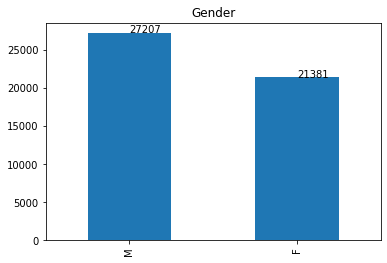

In [125]:
from scipy import stats
import matplotlib.pylab as plt

%matplotlib inline

(raw_completecase.gender).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.gender.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Gender")

We have 6000 more males than females

Text(0.5, 1.0, 'Histogram of Patient Age when Admitted')

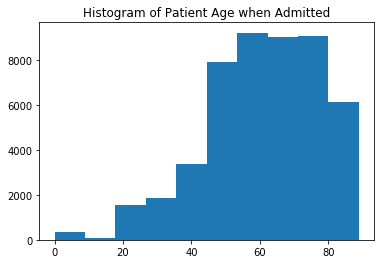

In [128]:
plt.hist(raw_completecase.age)
plt.title("Histogram of Patient Age when Admitted")

Age is left skewed. Will need to try to transform using square root, cube root, or log.

['AdmitDiagnosis',
 'AdmitProcedure',
 'ExpiredHospital',
 'LOSdays',
 'LOSgroupNum',
 'NumCPTevents',
 'NumCallouts',
 'NumChartEvents',
 'NumDiagnosis',
 'NumInput',
 'NumLabs',
 'NumMicroLabs',
 'NumNotes',
 'NumOutput',
 'NumProcEvents',
 'NumProcs',
 'NumRx',
 'NumTransfers',
 'TotalNumInteract',
 'admit_location',
 'admit_type',
 'age',
 'ethnicity',
 'gender',
 'hadm_id',
 'insurance',
 'marital_status',
 'religion']

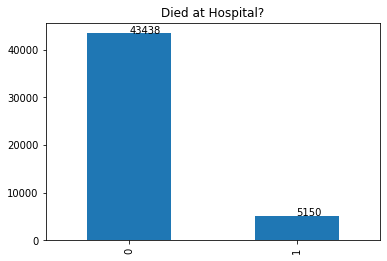

In [129]:
(raw_completecase.ExpiredHospital).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.ExpiredHospital.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Died at Hospital?")

We should probably get rid of those who died since we want Length of Stay, which will be quite different for those who are going to die?

Text(0.5, 1.0, 'Total Number of Procedures')

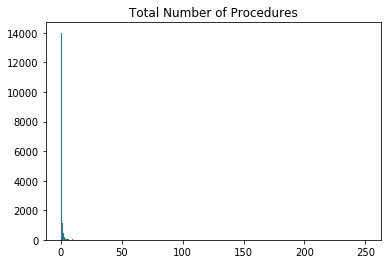

In [151]:
plt.hist(raw_completecase.NumProcs, bins = 1000)
plt.title("Total Number of Procedures")

Text(0.5, 1.0, 'Total Number of Rx')

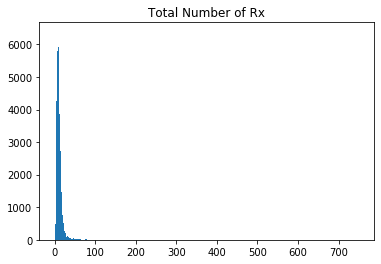

In [152]:
plt.hist(raw_completecase.NumRx, bins = 500)
plt.title("Total Number of Rx")

Text(0.5, 1.0, 'Total Number of Transfers')

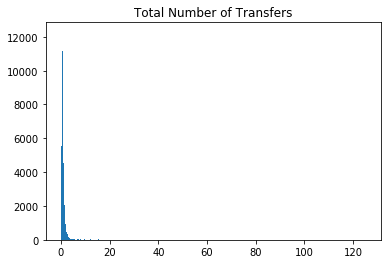

In [153]:
plt.hist(raw_completecase.NumTransfers, bins=500)
plt.title("Total Number of Transfers")

In [154]:
max(raw_completecase.NumTransfers)

125.0

Generally speaking a lot of these continuous predictors may have outliers.

In [145]:
raw_completecase.NumTransfers.describe()

count    48588.000000
mean         0.943240
std          2.088998
min          0.000000
25%          0.380000
50%          0.630000
75%          1.000000
max        125.000000
Name: NumTransfers, dtype: float64

Text(0.5, 1.0, 'Total Number of Interactions')

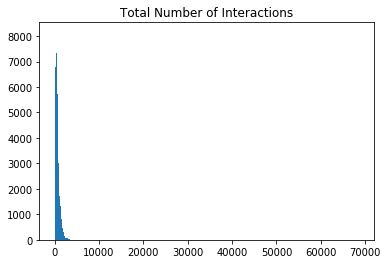

In [155]:
plt.hist(raw_completecase.TotalNumInteract, bins=500)
plt.title("Total Number of Interactions")

In [156]:
max(raw_completecase.TotalNumInteract)

68600.0

In [142]:
min(raw_completecase.TotalNumInteract)

0.0

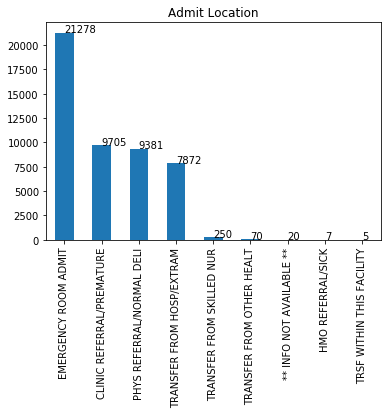

In [134]:
(raw_completecase.admit_location).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.admit_location.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Location")

Maybe we need to perform ANOVA to find out which categories can be collapsed.

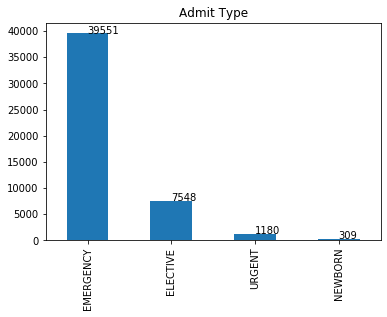

In [135]:
(raw_completecase.admit_type).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.admit_type.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Type")

Imbalance heavily favoring emergency.

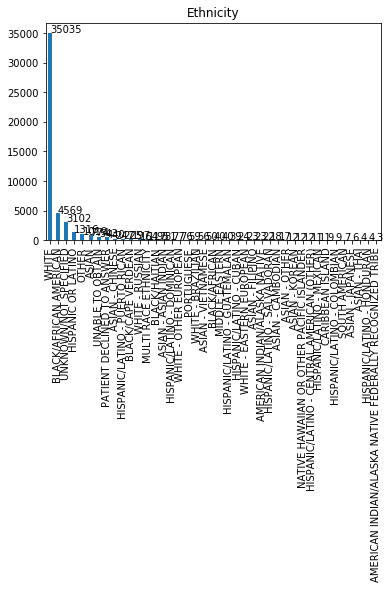

In [133]:
(raw_completecase.ethnicity).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.ethnicity.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Ethnicity")

Definitely consolidate.

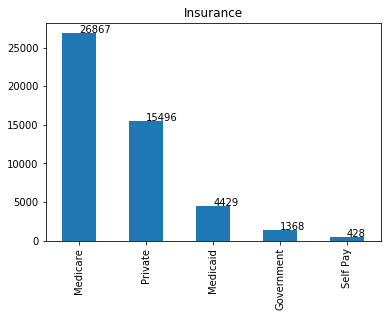

In [132]:
(raw_completecase.insurance).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.insurance.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Insurance")

Insurance is worth consolidating.

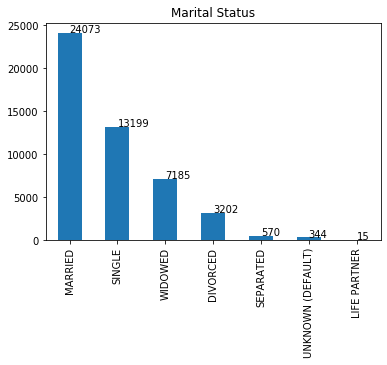

In [131]:
(raw_completecase.marital_status).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.marital_status.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Marital Status")

Also worth consolidating.

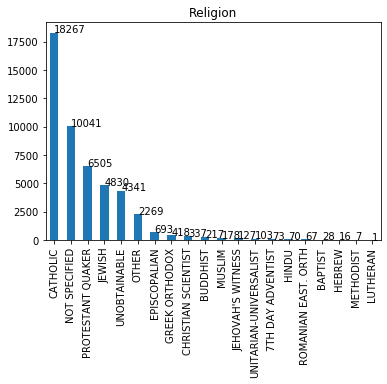

In [130]:
(raw_completecase.religion).value_counts().plot(kind='bar')
for index, value in enumerate(raw_completecase.religion.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Religion")

Definitely worth consolidating these religions.

## Simple apriori dataset:

In [157]:
raw_completecase.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [ ]:
to_dummify_simple = ['admit_type', 'admit_location', 'insurance',]

simple_data = raw_completecase[['gender', 'age', 'LOSdays','LOSgroupNum']]

# Random Forest: